## What is Softmax Regression?

### 1. Logistic Regression handles binary classification (two classes).

### 2. Softmax Regression (aka Multinomial Logistic Regression) is the extension for multiclass classification (3 or more classes).

### Example: Instead of just classifying "Virginica" vs "Not Virginica" (binary), Softmax Regression can classify Setosa vs Versicolor vs Virginica directly.


### How does it work?

1. Compute a score for each class
   For each class k, we compute:

- `s_k​(x)=θ_kᵀx`
- x = feature vector (input).
- θ_k = parameter vector (weights) for class k.
- Each class has its own weight vector.
- Collecting all θ_k into a matrix θ.

2. Apply the Softmax function
   We convert raw scores `[s_1(x), s_2(x),..., s_k(x)]` into probabilities:

- `p_k(x) = exp(s_k(x)) / Σexp(s_j(x))`
- Exponentials ensure positivity.
- Division by the sum ensures probabilities sum to 1.
- This gives the probability of class k given input x.

3. Make a prediction
   Choose the class with the highest probability:

- `y = arg max_k p_k(x)`
- So the predicted class = the one with the largest score/probability


### Training the model (Cost function)

We want our model to assign high probability to the correct class.
We use the Cross-Entropy Loss:

- `J(θ) = -1/m Σ(1 to m) Σ(1 to k) y_i^k log(p_k^i)`
- m = number of training examples.
- y_i^k = target (1 if example i belongs to class k, else 0).
- p_k^i = predicted probability for class k.
  This loss is small when the correct class has high probability, and large otherwise.


### Gradient for optimization

To train with Gradient Descent, we compute the derivative:

- `∇_θ_k J(θ) = 1/m Σ(p_k^i - y_i^k) x^i`
- If predicition p_k^i matches target y_i^k, gradient = 0 (no updated needed).
- If wrong, weights are adjusted to reduce the error.


### Key points

- Softmax Regression = Logistic Regression generalized to multiple classes.
- Outputs a probability distribution over classes.
- Uses cross-entropy as the cost function.
- Trained with gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

print("Dataset keys:", list(iris.keys()))
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Data shape:", iris.data.shape)
print("Target shape:", iris.target.shape)

Dataset keys: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
Target shape: (150,)


In [2]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", C=10, random_state=42
)
softmax_reg.fit(X, y)

d:\VScode\ML\ml-foundation\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


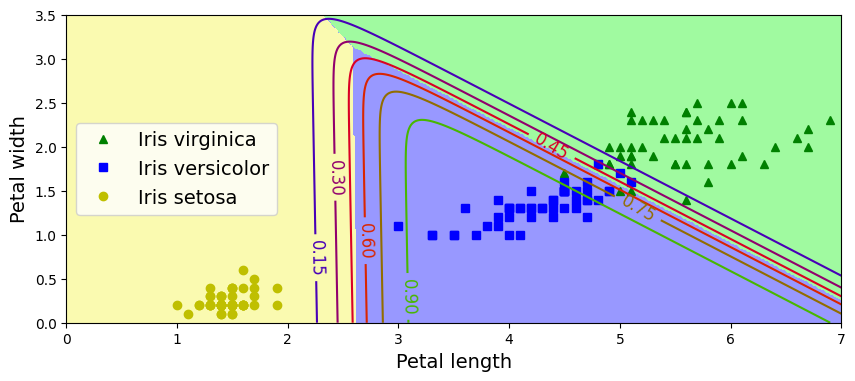

In [3]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [4]:
softmax_reg.predict([[5, 2]])

array([2])

In [5]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626370e-07, 5.73689802e-02, 9.42630398e-01]])